# Case - Visualização de dados do Covid-19

Esse case tem como objetivo mostrar visualmente a evolução da pandemia de Covid-19. 
Como fonte, foram selecionadas as seguintes bases de dados:
https://ourworldindata.org/grapher/daily-covid-deaths-7-day

# Preparação dos dados

In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
deaths = pd.read_csv('daily-covid-deaths-7-day.csv', sep=',')
deaths = deaths.rename(columns={"Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)": "deaths_avg"})

In [10]:
deaths.head()

,Entity,Code,Day,deaths_avg
0,Afghanistan,AFG,2020-03-25,0.33333
1,Afghanistan,AFG,2020-03-26,0.50000
2,Afghanistan,AFG,2020-03-27,0.40000
3,Afghanistan,AFG,2020-03-28,0.33333
4,Afghanistan,AFG,2020-03-29,0.57143


# Média de mortes por país

<AxesSubplot:xlabel='Data', ylabel='Média de mortes'>

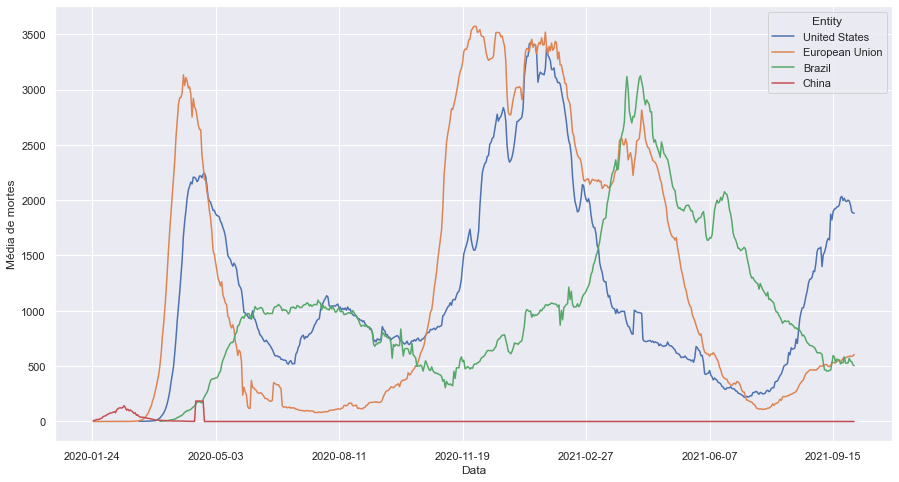

In [18]:
sns.set(rc={'figure.figsize':(15, 8)})
df = deaths.loc[:, ('Day', 'deaths_avg', 'Entity')]
df_grouped = df.groupby(["Day", "Entity"]).agg(sum_qtd=("deaths_avg", "sum")).reset_index()

df_pivot = df_grouped.pivot(index="Day", columns="Entity", values="sum_qtd").reset_index()

selected_df_pivot = df_pivot.loc[:, ("Day", "United States", "European Union", "Brazil", "China")]

selected_df_pivot.plot(x="Day", xlabel="Data", ylabel="Média de mortes")

In [21]:
# Média de mortes no último mês de 2021
deaths.sort_values('Day', ascending=False)

,Entity,Code,Day,deaths_avg
108605,Zimbabwe,ZWE,2021-10-02,3.14286
91474,Sri Lanka,LKA,2021-10-02,58.57143
44663,Iceland,ISL,2021-10-02,0.00000
85898,Sierra Leone,SLE,2021-10-02,0.00000
65412,Monaco,MCO,2021-10-02,0.00000
...,...,...,...,...
5685,Asia excl. China,NaN,2020-01-24,0.00000
5067,Asia,NaN,2020-01-24,3.00000
105129,World excl. China,NaN,2020-01-24,0.00000
104511,World,OWID_WRL,2020-01-24,3.00000


In [31]:
media_movel_set = deaths[((deaths.Day >= '2021-09-03') & (deaths.Day <= '2021-10-02'))]

In [32]:
media_movel_set = media_movel_set.groupby('Entity').mean()
media_movel_set = media_movel_set['deaths_avg'] / 100
media_movel_set.sort_values(ascending=False)

Entity
World                                                  86.840143
World excl. China                                      86.840143
World excl. China and South Korea                      86.775571
World excl. China, South Korea, Japan and Singapore    86.235619
Upper middle income                                    38.425714
                                                         ...    
International                                           0.000000
Burundi                                                 0.000000
Chad                                                    0.000000
Tajikistan                                              0.000000
China                                                   0.000000
Name: deaths_avg, Length: 203, dtype: float64